<a href="https://colab.research.google.com/github/RylieWeaver9/Machine-Learning/blob/main/Neural%20Network%20on%20Fashion%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 3 (Exercise 10 w/ Fashion Dataset)**

### Import necessary libararies

In [ ]:
import sys
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

### Import path

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load in data and check shape

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

### Separate out validation set

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

### Plot out an example image from the training dataset

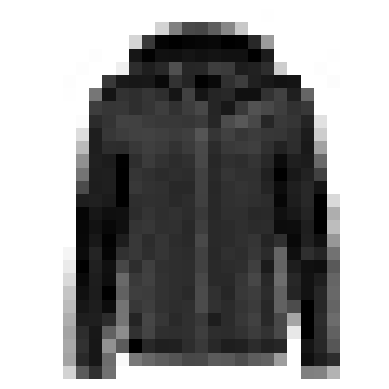

In [ ]:
# Let's plot an image using Matplotlib's imshow() function, with a 'binary' color map:

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### Check some shapes and etc...

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### Plot a bunch of images

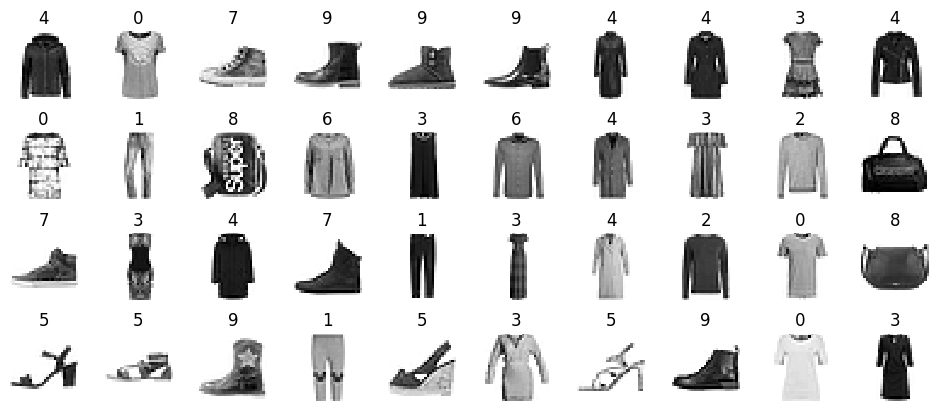

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Setup with Keras

In [ ]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### Define neural network architecture

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 13s 7ms/step - loss: 973029376000.0000 - accuracy: 0.5119 - val_loss: 2.3482 - val_accuracy: 0.0976


Text(0, 0.5, 'Loss')

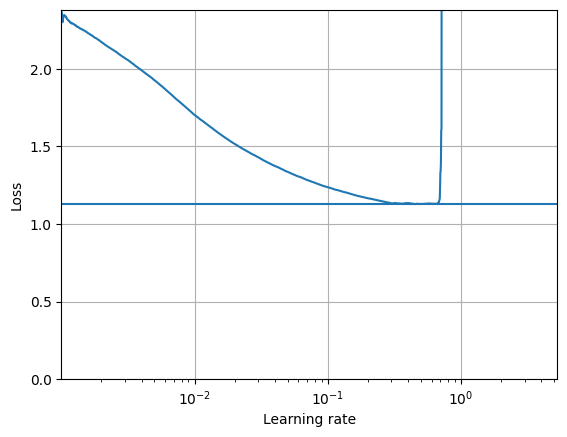

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

### Train model with early stopping if model isn't improving (save time)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1716/1719 [============================>.] - ETA: 0s - loss: 0.5814 - accuracy: 0.7858

1719/1719 [==============================] - 12s 7ms/step - loss: 0.5811 - accuracy: 0.7859 - val_loss: 0.6038 - val_accuracy: 0.7642
Epoch 2/100
1711/1719 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.8489

1719/1719 [==============================] - 11s 6ms/step - loss: 0.4093 - accuracy: 0.8489 - val_loss: 0.3801 - val_accuracy: 0.8558
Epoch 3/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3647 - accuracy: 0.8654 - val_loss: 0.7720 - val_accuracy: 0.7706
Epoch 4/100
1711/1719 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8733

1719/1719 [==============================] - 11s 6ms/step - loss: 0.3396 - accuracy: 0.8732 - val_loss: 0.3338 - val_accuracy: 0.8748
Epoch 5/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3250 - accuracy: 0.8788 - val_loss: 0.3344 - val_accuracy: 0.8792
Epoch 6/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3075 - accuracy: 0.8847 - val_loss: 0.3486 - val_accuracy: 0.8778
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2978 - accuracy: 0.8889 - val_loss: 0.3415 - val_accuracy: 0.8778
Epoch 8/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2872 - accuracy: 0.8919 - val_loss: 0.4137 - val_accuracy: 0.8588
Epoch 9/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2791 - accuracy: 0.8939 - val_loss: 0.3449 - val_accuracy: 0.8820
Epoch 10/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2714 - accuracy: 0.8965 - val_loss: 0.3350 - val_accura

1719/1719 [==============================] - 11s 6ms/step - loss: 0.2554 - accuracy: 0.9020 - val_loss: 0.3209 - val_accuracy: 0.8836
Epoch 13/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2515 - accuracy: 0.9053 - val_loss: 0.3322 - val_accuracy: 0.8860
Epoch 14/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2461 - accuracy: 0.9075 - val_loss: 0.3400 - val_accuracy: 0.8828
Epoch 15/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2393 - accuracy: 0.9094 - val_loss: 0.3393 - val_accuracy: 0.8780
Epoch 16/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2328 - accuracy: 0.9113 - val_loss: 0.3259 - val_accuracy: 0.8914
Epoch 17/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2354 - accuracy: 0.9110 - val_loss: 0.3643 - val_accuracy: 0.8754
Epoch 18/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2270 - accuracy: 0.9131 - val_loss: 0.3762 - val_ac

1719/1719 [==============================] - 11s 6ms/step - loss: 0.2211 - accuracy: 0.9155 - val_loss: 0.3109 - val_accuracy: 0.8970
Epoch 20/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2153 - accuracy: 0.9181 - val_loss: 0.3911 - val_accuracy: 0.8764
Epoch 21/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2078 - accuracy: 0.9206 - val_loss: 0.3511 - val_accuracy: 0.8924
Epoch 22/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2064 - accuracy: 0.9205 - val_loss: 0.3723 - val_accuracy: 0.8870
Epoch 23/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2037 - accuracy: 0.9224 - val_loss: 0.3598 - val_accuracy: 0.8906
Epoch 24/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2006 - accuracy: 0.9226 - val_loss: 0.3751 - val_accuracy: 0.8890
Epoch 25/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1972 - accuracy: 0.9247 - val_loss: 0.4123 - val_a

### Go back to best model and evaluate

In [ ]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8874


[0.33756616711616516, 0.8873999714851379]

## Accuracy: 88.74%